### UNSUPERVISED MACHINE LEARNING FOR THE CLASSIFICATION OF ASTROPHYSICAL X-RAY SOURCES

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from astropy import stats
from astropy.io.votable import parse

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 16)
plt.style.use('ggplot')

In [3]:
votable = parse("./data/corpus.vot")

In [4]:
def votable_to_pandas(votable_file):
    votable = parse(votable_file)
    table = votable.get_first_table().to_table(use_names_over_ids=True)
    return table.to_pandas()

In [5]:
data = votable_to_pandas("./data/corpus.vot")

#### Exploración

In [8]:
data.describe()

,ra,dec,significance,region_id,obsid,ra_targ,dec_targ,livetime,flux_significance_b,flux_significance_h,...,var_prob_u,ks_prob_u,kp_prob_u,var_sigma_u,var_mean_u,var_min_u,var_max_u,gti_start,gti_stop,gti_elapse
count,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,...,2.774000e+03,2774.000000,2774.000000,2.774000e+03,2774.000000,2774.000000,2774.000000,3.151000e+03,3.151000e+03,3151.000000
mean,157.896790,6.534330,103.464305,357.019042,6925.645827,157.886649,6.531302,46452.803962,53.683155,27.500680,...,3.159220e-01,0.526879,0.525569,1.459822e+00,0.090582,0.011715,32.392270,2.554103e+08,2.554581e+08,47794.578265
std,92.251780,38.880717,111.972319,767.105425,4537.415381,92.245629,38.874096,42713.862978,48.689427,33.048489,...,2.725862e-01,0.305811,0.302616,3.236998e+01,1.711757,0.029822,738.080443,1.286077e+08,1.286066e+08,43180.088911
min,0.723296,-79.081229,1.826087,1.000000,62.000000,0.779409,-79.027222,433.006013,8.695467,5.000000,...,6.062372e-07,0.000960,0.000173,2.039760e-10,0.000171,0.000012,0.000239,6.596388e+07,6.598791e+07,1033.600000
25%,83.816564,-20.903519,28.272329,15.000000,3138.000000,83.819583,-20.890000,14868.727238,23.133247,9.264409,...,9.798736e-02,0.253159,0.267283,3.467225e-05,0.001216,0.001054,0.001895,1.468540e+08,1.469025e+08,15181.499925
50%,172.964926,12.391069,66.154583,74.000000,6114.000000,172.965000,12.328861,35523.448543,37.641912,15.964964,...,2.166946e-01,0.531810,0.522358,9.592797e-05,0.003239,0.002877,0.004493,2.386232e+08,2.386724e+08,36754.558846
75%,204.374152,41.212710,146.045596,285.000000,10471.000000,204.253333,41.219727,59197.272245,66.157577,31.789057,...,4.632120e-01,0.803210,0.796192,2.918301e-04,0.012070,0.010906,0.014199,3.610472e+08,3.610799e+08,60108.799775
max,359.857081,86.320337,1181.210704,4545.000000,49899.000000,359.919167,86.320472,189849.815809,415.932087,373.858074,...,1.000000e+00,1.000000,1.000000,1.258224e+03,53.530787,1.017249,29628.476935,5.361096e+08,5.361516e+08,192363.182400


In [9]:
data.head()

,name,ra,dec,significance,region_id,obsid,targname,ra_targ,dec_targ,livetime,...,var_prob_u,ks_prob_u,kp_prob_u,var_sigma_u,var_mean_u,var_min_u,var_max_u,gti_start,gti_stop,gti_elapse
0,2CXO J000338.9+160220,0.912395,16.039005,44.672726,2,11309,NGC 7814,0.779409,16.106385,58331.436197,...,0.435570,0.018687,0.057131,0.000089,0.000997,0.000959,0.002132,3.682219e+08,3.682810e+08,59106.93327
1,2CXO J000313.3+160827,0.805518,16.141055,19.156785,26,11309,NGC 7814,0.779409,16.106385,58334.657679,...,0.424533,0.250745,0.167119,0.000056,0.000694,0.000673,0.001196,3.682219e+08,3.682810e+08,59106.93327
2,2CXO J000253.5-260346,0.723296,-26.062888,24.365073,12,14216,Q 0000-263,0.845417,-26.054667,9841.779145,...,0.110322,0.006371,0.020605,0.000030,0.005559,0.005529,0.005612,4.948084e+08,4.948184e+08,9967.99996
3,2CXO J000818.2+512316,2.075910,51.387976,54.983076,16,8942,KPD 0005+5106,2.076667,51.388611,47409.230467,...,0.140189,0.867490,0.761225,0.000376,0.082374,0.081998,0.082750,3.222917e+08,3.223397e+08,48036.86751
4,2CXO J000807.6+512445,2.031799,51.412665,53.425510,24,8942,KPD 0005+5106,2.076667,51.388611,47409.230467,...,0.086136,0.842101,0.379493,0.000056,0.010163,0.010087,0.010225,3.222917e+08,3.223397e+08,48036.86751


In [10]:
data.columns

Index(['name', 'ra', 'dec', 'significance', 'region_id', 'obsid', 'targname',
       'ra_targ', 'dec_targ', 'livetime', 'flux_significance_b',
       'flux_significance_h', 'flux_significance_m', 'flux_significance_s',
       'flux_significance_u', 'hard_hm', 'hard_hm_lolim', 'hard_hm_hilim',
       'hard_hs', 'hard_hs_lolim', 'hard_hs_hilim', 'hard_ms', 'hard_ms_lolim',
       'hard_ms_hilim', 'var_code', 'var_index_b', 'var_prob_b', 'ks_prob_b',
       'kp_prob_b', 'var_sigma_b', 'var_mean_b', 'var_min_b', 'var_max_b',
       'var_index_h', 'var_prob_h', 'ks_prob_h', 'kp_prob_h', 'var_sigma_h',
       'var_mean_h', 'var_min_h', 'var_max_h', 'var_index_m', 'var_prob_m',
       'ks_prob_m', 'kp_prob_m', 'var_sigma_m', 'var_mean_m', 'var_min_m',
       'var_max_m', 'var_index_s', 'var_prob_s', 'ks_prob_s', 'kp_prob_s',
       'var_sigma_s', 'var_mean_s', 'var_min_s', 'var_max_s', 'var_index_u',
       'var_prob_u', 'ks_prob_u', 'kp_prob_u', 'var_sigma_u', 'var_mean_u',
       'var_min_u

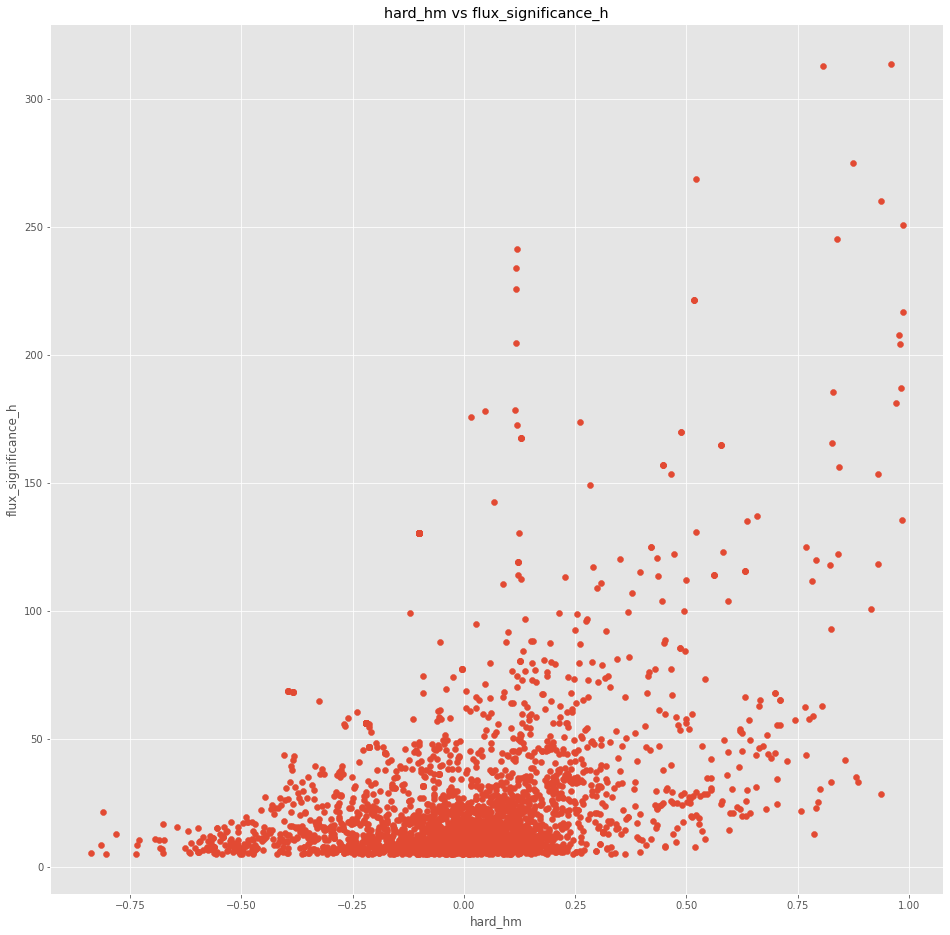

In [11]:
plt.scatter(data['hard_hm'],data.flux_significance_h)

#Labels and Tit
plt.title('hard_hm vs flux_significance_h')
plt.xlabel('hard_hm')
plt.ylabel('flux_significance_h')
plt.show()

In [12]:
features_coord = ['ra', 'dec','hard_hm','hard_hs','hard_ms', 'var_prob_b', 'var_prob_h', 'var_prob_m', 'var_prob_s', 'var_prob_u']

features = ['hard_hm','hard_hs','hard_ms', 'var_prob_b', 'var_prob_h', 'var_prob_m', 'var_prob_s', 'var_prob_u']

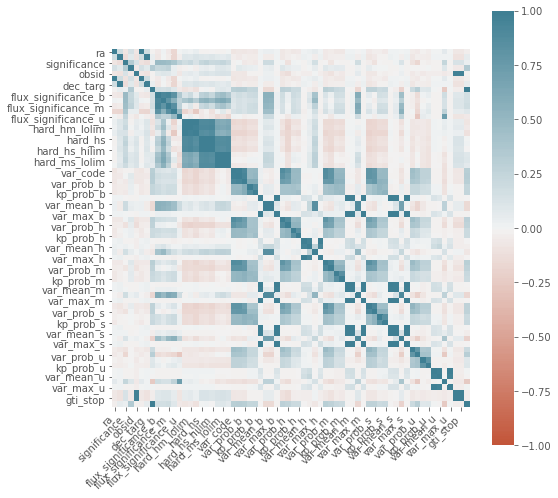

In [13]:
corr = data.corr()

fig, ax = plt.subplots(figsize=(8,8))   
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

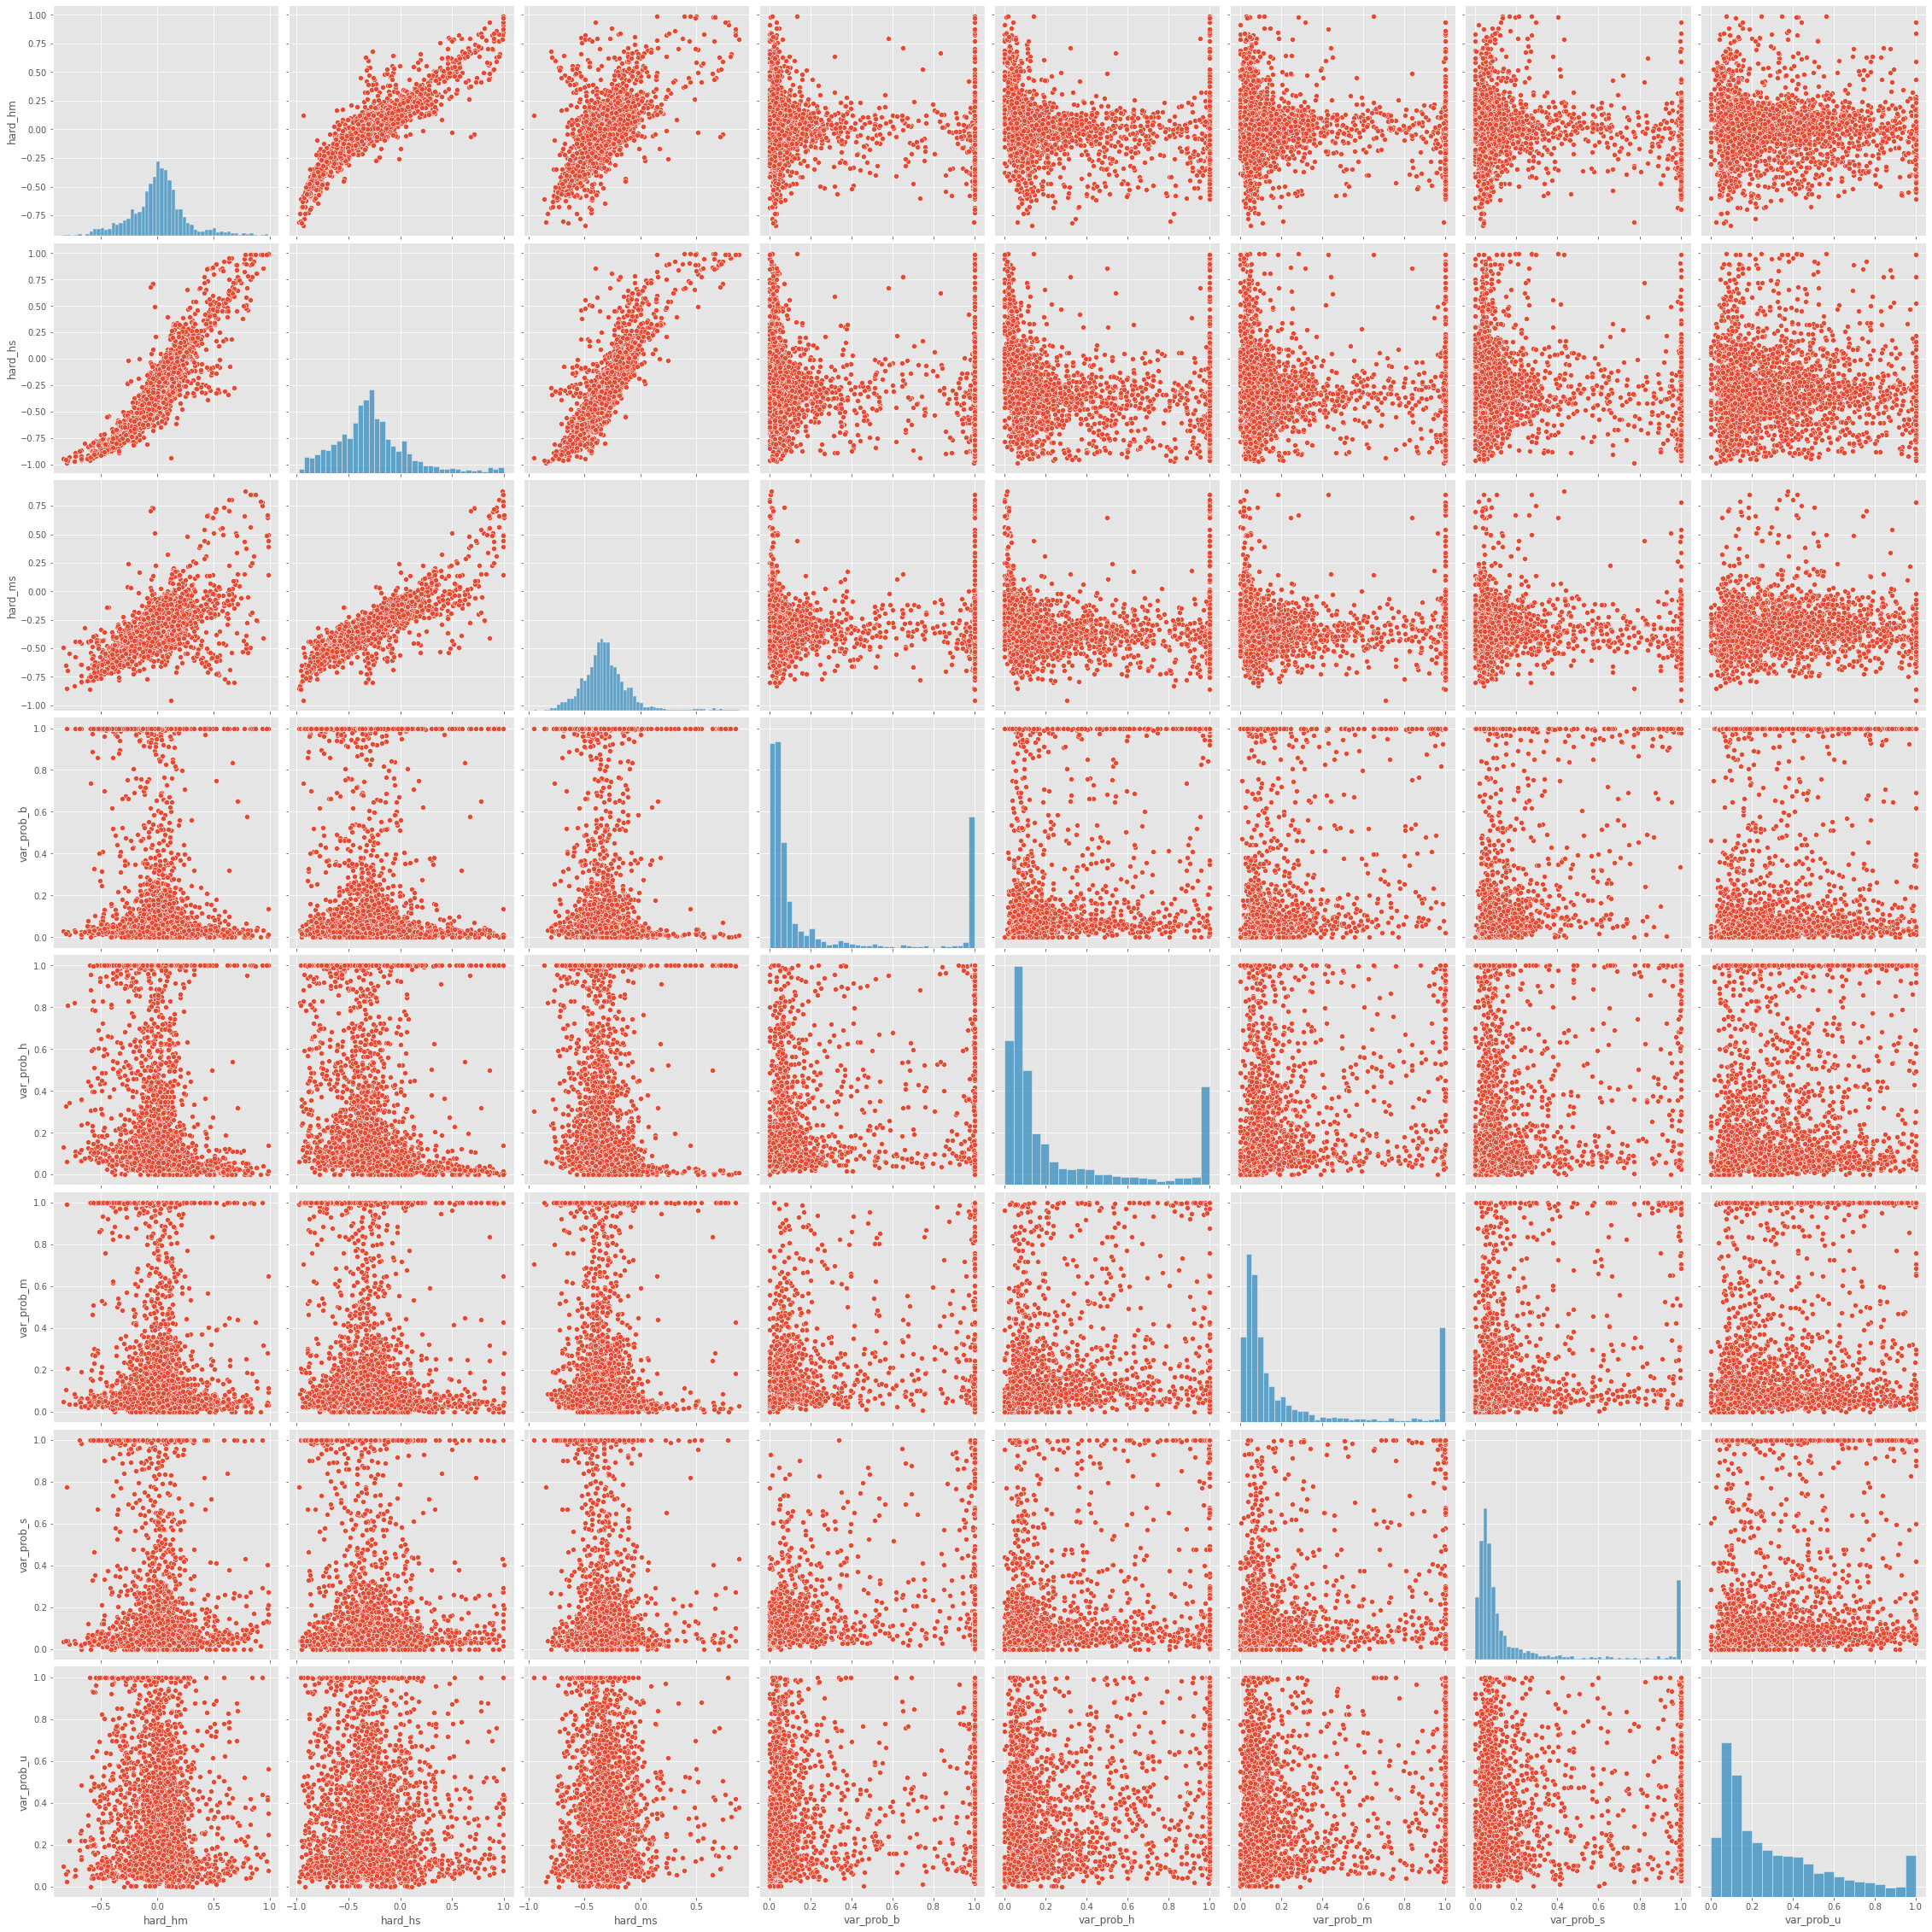

In [14]:
sns.pairplot(data.dropna(),height=4,vars=features,kind='scatter')

#### K-Means

In [15]:
features_coord = ['ra', 'dec','hard_hm','hard_hs','hard_ms', 'var_prob_b', 'var_prob_h', 'var_prob_m', 'var_prob_s', 'var_prob_u']

features = ['hard_hm','hard_hs','hard_ms', 'var_prob_b', 'var_prob_h', 'var_prob_m', 'var_prob_s', 'var_prob_u', 
            'ks_prob_b', 'kp_prob_b', 'var_sigma_b', 'ks_prob_h', 'kp_prob_h', 'var_sigma_h','ks_prob_m', 'kp_prob_m', 
            'var_sigma_m', 'ks_prob_s', 'kp_prob_s','var_sigma_s', 'ks_prob_u', 'kp_prob_u', 'var_sigma_u']

X_df_coord = data[features_coord].dropna()
X_df = X_df_coord[features]
X = X_df.to_numpy()

In [16]:
X_df.head()

,hard_hm,hard_hs,hard_ms,var_prob_b,var_prob_h,var_prob_m,var_prob_s,var_prob_u
0,0.066209,-0.153654,-0.218613,0.999990,0.067591,0.245580,0.977727,0.435570
1,0.024984,-0.196127,-0.219863,0.195147,0.226168,0.105840,0.649761,0.424533
2,-0.008745,-0.322299,-0.313554,0.000120,0.199926,0.000306,0.092855,0.110322
3,-0.464710,-0.838226,-0.612117,0.059523,0.486635,0.045348,0.052222,0.140189
4,-0.312305,-0.806996,-0.660837,1.000000,1.000000,0.999097,0.987284,0.086136


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


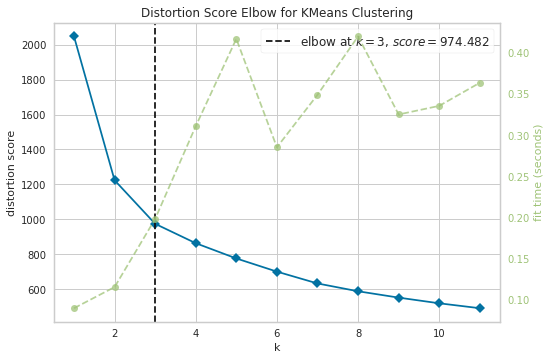

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X_df)        # Fit the data to the visualizer
visualizer.show()    

In [22]:
kmeans = KMeans(n_clusters=3).fit(X_df)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.051983   -0.39658805 -0.37197034  0.10461237  0.19076905  0.14035799
   0.10928822  0.27178619]
 [-0.11699185 -0.43282983 -0.37935687  0.9781102   0.80211043  0.8329709
   0.77450087  0.55362021]
 [ 0.3112994   0.23072708 -0.05262975  0.11992205  0.12532983  0.10329584
   0.08610655  0.27783654]]


In [25]:
%matplotlib widget
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 4], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 4], marker='*', c=colores, s=1000)

<IPython.core.display.Javascript object>

In [38]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 16)
plt.style.use('ggplot')

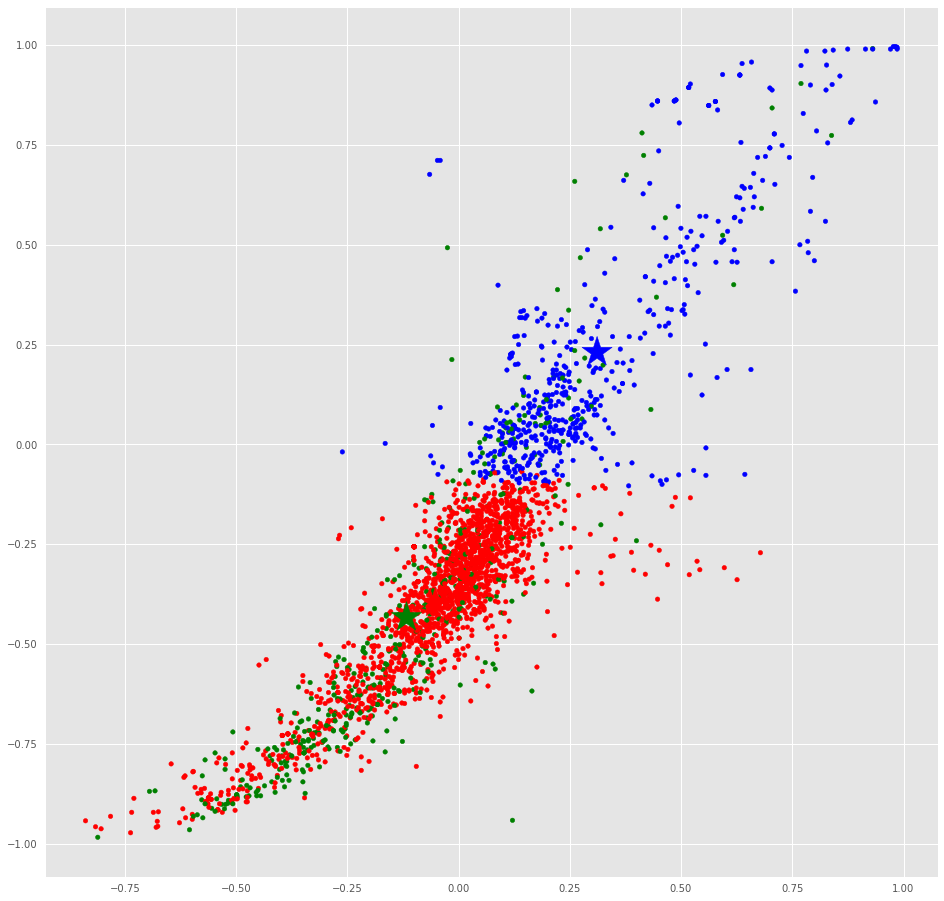

In [39]:
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=asignar,s=20)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)

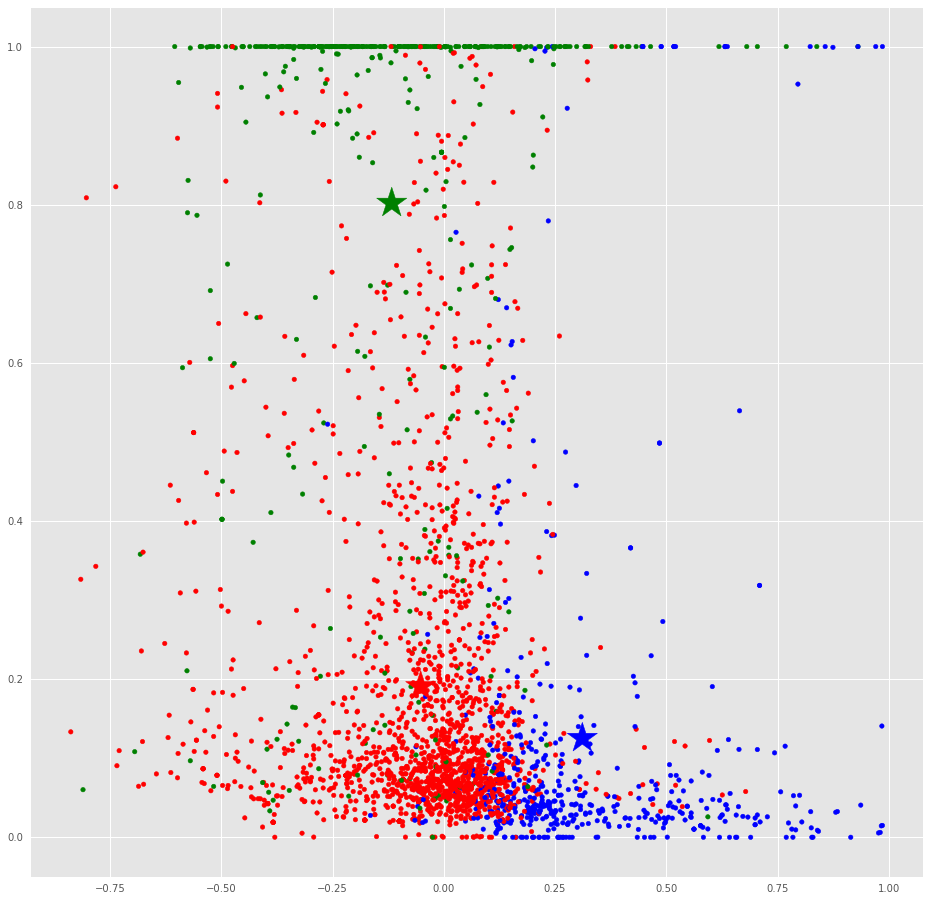

In [40]:
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 4], c=asignar,s=20)
plt.scatter(C[:, 0], C[:, 4], marker='*', c=colores, s=1000)

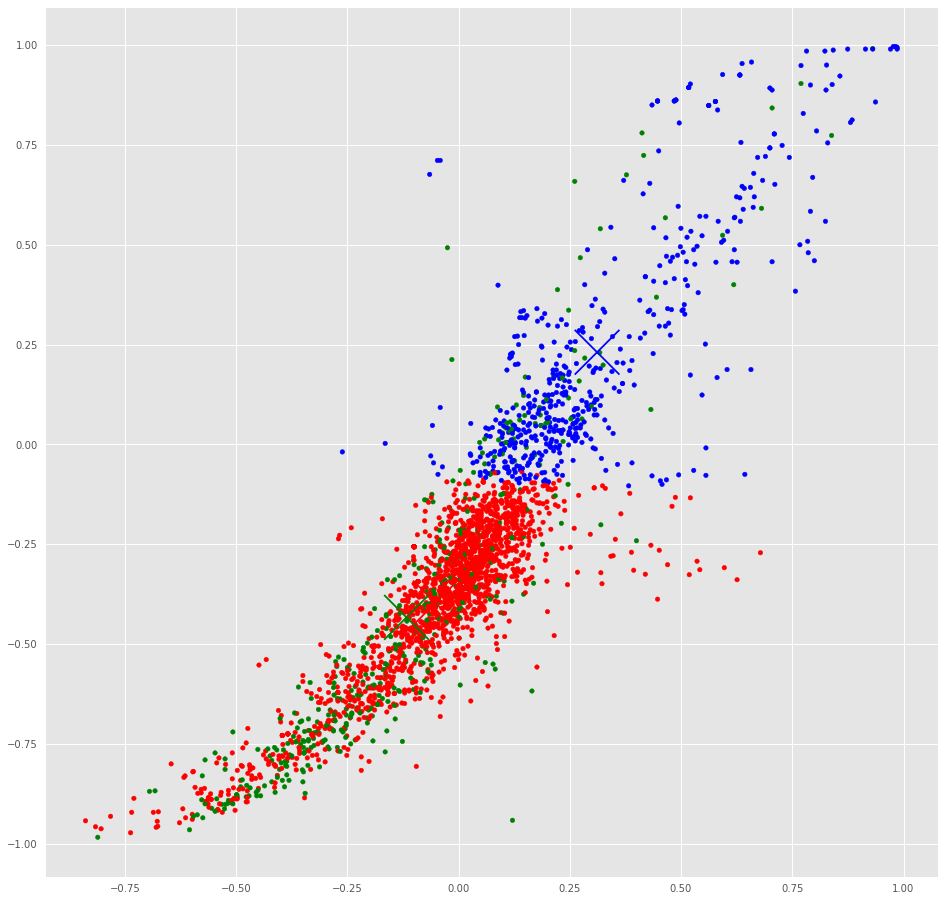

In [41]:
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=asignar,s=20)
plt.scatter(C[:, 0], C[:, 1], marker='x', c=colores, s=2000)

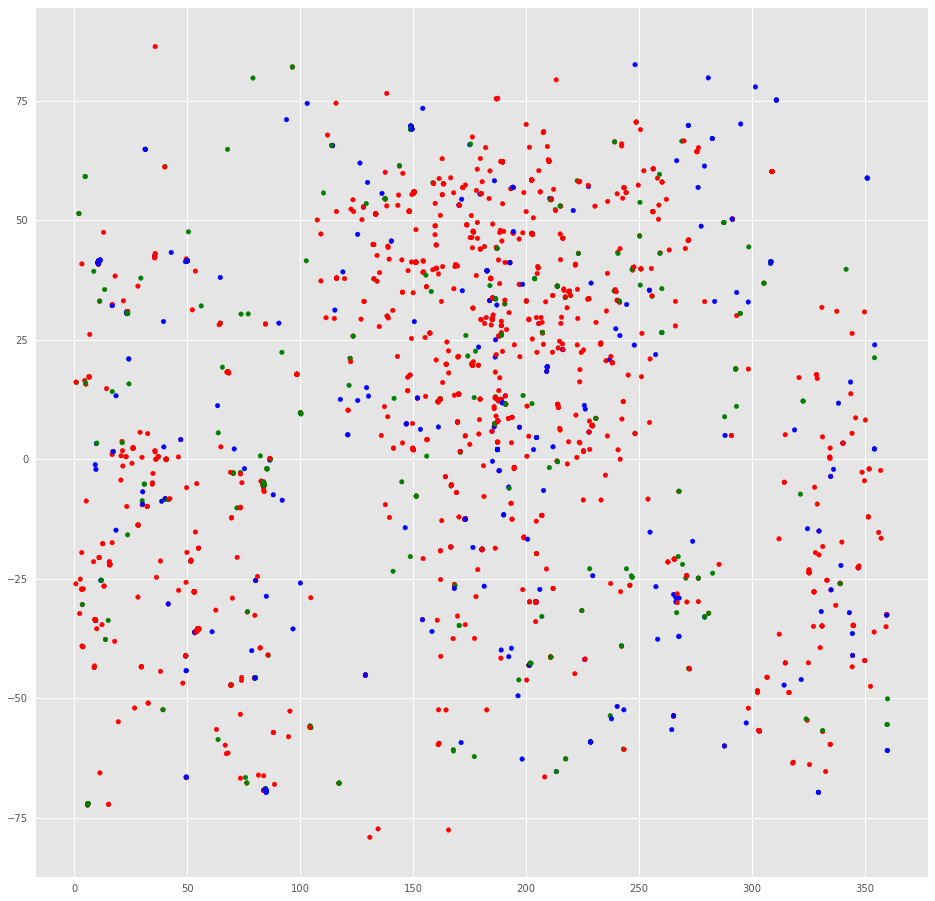

In [42]:
xd=X_df_coord.to_numpy()

fig = plt.figure()
plt.scatter(xd[:, 0], xd[:, 1], c=asignar,s=20)